**Problem 1**

In [96]:
from sympy import *
import numpy as np
x = symbols('x')
fx = (sin(x) + 1)**sin(cos(x))
diff(fx, x)

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [97]:
def fun(x):
    vals = (sin(x) + 1)**sin(cos(x))
    return vals

def fun_diff(x):
    diff = (-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))
    return diff

In [98]:
cvec = np.linspace(-np.pi, np.pi, 100)
f = map_array(fun, cvec)
f_prime = map_array(fun_diff, cvec)

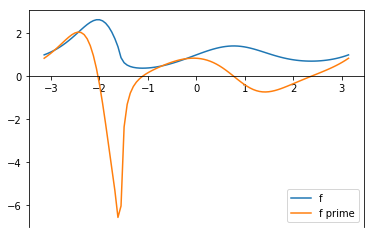

In [99]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, f)
plt.plot(cvec, f_prime)
plt.legend(['f', 'f prime'], loc='lower right')
plt.show()

**Problem 2**

In [100]:
def for_1(f, x, h):
    for_vals_1 = (f(x + h) - f(x)) / h
    return for_vals_1
def for_2(f, x, h):
    for_vals_2 = (-3*f(x) + 4*f(x + h) - f(x + 2*h)) / (2*h)
    return for_vals_2
def back_1(f, x, h):
    back_vals_1 = (f(x) - f(x - h)) / h
    return back_vals_1
def back_2(f, x, h):
    back_vals_2 = (3*f(x) - 4*f(x - h) + f(x - 2*h)) / (2*h)
    return back_vals_2
def cen_2(f, x, h):
    cen_vals_2 = (f(x + h) - f(x - h)) / (2*h)
    return cen_vals_2
def cen_4(f, x, h):
    cen_vals_4 = (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h)) / (12*h)
    return cen_vals_4

In [101]:
def map_num_array(f, x, h):
    y_array = np.array([f(fun, x, h) for x in cvec])
    return y_array

In [102]:
h0 = 10**(-3)
f_prime_1 = map_num_array(for_1, x, h0)
f_prime_2 = map_num_array(for_2, x, h0)
f_prime_3 = map_num_array(back_1, x, h0)
f_prime_4 = map_num_array(back_2, x, h0)
f_prime_5 = map_num_array(cen_2, x, h0)
f_prime_6 = map_num_array(cen_4, x, h0)

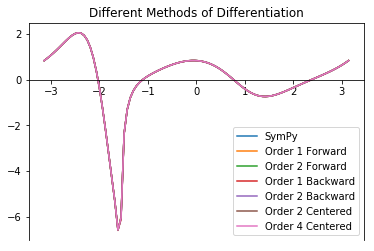

In [103]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, f_prime)
plt.plot(cvec, f_prime_1)
plt.plot(cvec, f_prime_2)
plt.plot(cvec, f_prime_3)
plt.plot(cvec, f_prime_4)
plt.plot(cvec, f_prime_5)
plt.plot(cvec, f_prime_6)
plt.title('Different Methods of Differentiation')
plt.legend(['SymPy', 'Order 1 Forward', 'Order 2 Forward', 'Order 1 Backward', 'Order 2 Backward', 
            'Order 2 Centered', 'Order 4 Centered'], loc='lower right')

**Problem 3**

In [104]:
def map_error_array(f, x, hvec):
    y_array = np.array([f(fun, x, hi) for hi in hvec])
    abs_err = abs(y_array - fx0)
    return abs_err

In [105]:
x0 = 0
fx0 = fun_diff(x0)
hvec = np.logspace(-8, 0, 9)

In [106]:
for_err_1 = map_error_array(for_1, x0, hvec)
for_err_2 = map_error_array(for_2, x0, hvec)
back_err_1 = map_error_array(back_1, x0, hvec)
back_err_2 = map_error_array(back_2, x0, hvec)
cen_err_2 = map_error_array(cen_2, x0, hvec)
cen_err_4 = map_error_array(cen_4, x0, hvec)

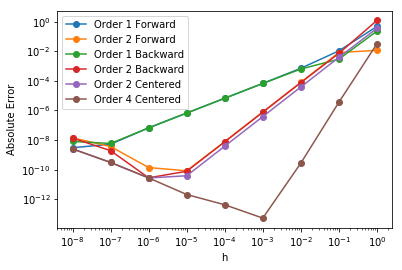

In [107]:
plt.loglog(hvec, for_err_1, marker = 'o')
plt.loglog(hvec, for_err_2, marker = 'o')
plt.loglog(hvec, back_err_1, marker = 'o')
plt.loglog(hvec, back_err_2, marker = 'o')
plt.loglog(hvec, cen_err_2, marker = 'o')
plt.loglog(hvec, cen_err_4, marker = 'o')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.legend(['Order 1 Forward', 'Order 2 Forward', 'Order 1 Backward', 'Order 2 Backward', 
            'Order 2 Centered', 'Order 4 Centered'], loc='upper left')
plt.show()

**Problem 4**

In [108]:
def x_coord(alpha, beta):
    x_crds = 500 * tan(beta) / (tan(beta) - tan(alpha))
    return x_crds
def y_coord(alpha, beta):
    y_crds = 500 * tan(beta) * tan(alpha) / (tan(beta) - tan(alpha))
    return y_crds

In [109]:
coords = np.load('plane.npy')

In [112]:
ts = []
alphas = []
betas = []
for i in range(len(coords)):
    a = np.deg2rad(coords[i][1])
    b = np.deg2rad(coords[i][2])
    ts.append(coords[i][0])
    alphas.append(a)
    betas.append(b)

In [113]:
x = list(map(x_coord, alphas, betas))
y = list(map(y_coord, alphas, betas))

In [114]:
def forward_1(t):
    i = t - 7
    x_prime = (x[i + 1] - x[i]) / 1
    y_prime = (y[i + 1] - y[i]) / 1
    return [x_prime, y_prime]

def backward_1(t):
    i = t - 7
    x_prime = (x[i] - x[i - 1]) / 1
    y_prime = (y[i] - y[i - 1]) / 1
    return [x_prime, y_prime]

def center_2(t):
    i = t - 7
    x_prime = (x[i + 1] - x[i - 1]) / 2
    y_prime = (y[i + 1] - y[i - 1]) / 2
    return [x_prime, y_prime]

In [115]:
def speed_cal(x_prime, y_prime):
    s = (x_prime**2 + y_prime**2)**0.5
    return s

In [116]:
speed = []
for t in ts:
    if t == 7:
        x_y = forward_1(int(t))
        s = speed_cal(x_y[0], x_y[1])
        speed.append(s)
    elif t == 14:
        x_y = backward_1(int(t))
        s = speed_cal(x_y[0], x_y[1])
        speed.append(s)
    else:
        x_y = center_2(int(t))
        s = speed_cal(x_y[0], x_y[1])
        speed.append(s)

In [117]:
import pandas as pd
dic = {'t':ts, 'Speed':speed}
df = pd.DataFrame(data = dic)
df

,Speed,t
0,46.4242006221354,7.0
1,47.0010393809513,8.0
2,48.9988051403671,9.0
3,50.0994416296545,10.0
4,48.2903508382033,11.0
5,51.5645590492716,12.0
6,53.9230335450556,13.0
7,51.5148005696385,14.0


**Problem 5**

In [118]:
def test_f(x, y):
    f1 = [x**2]
    f2 = [x**3 + y]
    return [f1, f2]

In [119]:
def jacobian_m(f, x, h):
    x0 = x[0][0]
    y0 = x[1][0]
    column_1 = (np.array(test_f(x0 + h, y0))- np.array(test_f(x0 - h, y0))) / (2*h)
    column_2 = (np.array(test_f(x0, y0 + h))- np.array(test_f(x0, y0 - h))) / (2*h)
    list_1 = column_1.tolist()
    list_2 = column_2.tolist()
    matrix = [[list_1[0][0], list_2[0][0]], [list_1[1][0], list_2[1][0]]]
    matrix = np.array(matrix)
    return matrix

In [120]:
xx = [[1], [1]]
jacobian_m(test_f, xx, h0)

array([[2.      , 0.      ],
       [3.000001, 1.      ]])

In [122]:
# check with SymPy
y = symbols('y')
x0 = 1
check_prime = np.array([[2 * x0, 0],[3 * x0 ** 2, 1]])
check_prime

array([[2, 0],
       [3, 1]])

**Problem 7**

In [126]:
from autograd import numpy as anp
from autograd import grad
import time
import random
h1 = 1e-3
g = lambda x: (anp.sin(x) + 1)**anp.sin(anp.cos(x))

In [127]:
sy_time = []
sy_errs = []
grad_time = []
grad_errs = []
diff_time = []
diff_errs = []

In [128]:
def cal_time(n):
    for i in range(n):
        x0 = random.uniform(-2*np.pi, 2*np.pi)
        # Sympy
        sy_start = time.time()
        dif = diff(fx)
        sy_val = fun_diff(x0)
        sy_t = time.time() - sy_start
        sy_time.append(sy_t)
        sy_errs.append(1e-18)
        # Fourth-order centered difference quotient
        diff_start = time.time()
        diff_val = cen_4(fun, x0, h1)
        diff_t = time.time() - diff_start
        diff_err = abs(diff_val - sy_val)
        diff_time.append(diff_t)
        diff_errs.append(diff_err)
        # Autograd
        grad_start = time.time()
        dg = grad(g)
        grad_val = dg(x0)
        grad_t = time.time() - grad_start
        grad_err = abs(grad_val - sy_val)
        grad_time.append(grad_t)
        grad_errs.append(grad_err)

In [133]:
cal_time(200)

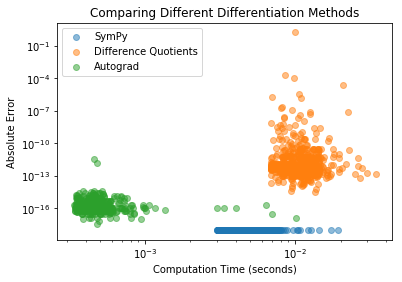

In [135]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(sy_time, sy_errs, alpha = 0.5)
plt.scatter(diff_time, diff_errs, alpha = 0.5)
plt.scatter(grad_time, grad_errs, alpha = 0.5)
plt.xlabel('Computation Time (seconds)')
plt.ylabel('Absolute Error')
plt.title('Comparing Different Differentiation Methods')
plt.legend(['SymPy', 'Difference Quotients', 'Autograd'], loc='upper left')